# Forming a Cluter with flowers using Petal and length features from the iris dataset

In [52]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [53]:
iris= load_iris()

In [54]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [55]:
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [56]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### Plotting a scatter graph

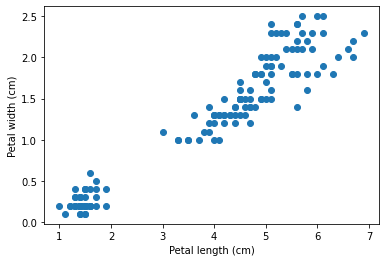

In [57]:
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.scatter(iris['petal length (cm)'], iris['petal width (cm)']);

In [61]:


iris = iris.drop( 'sepal length (cm)' ,axis='columns')
iris = iris.drop( 'sepal width (cm)' ,axis='columns')
iris.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


### Scale the Petal width and Petal height using MinMaxScaler

Scaling the petal length

In [65]:
scaler = MinMaxScaler()
scaler.fit(iris[['petal length (cm)']])
iris['petal length (cm)'] = scaler.transform(iris[['petal length (cm)']])
iris.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


Scaling the petal width

In [66]:
scaler.fit(iris[['petal width (cm)']])
iris['petal width (cm)'] = scaler.transform(iris[['petal width (cm)']])
iris.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


### Scatter Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


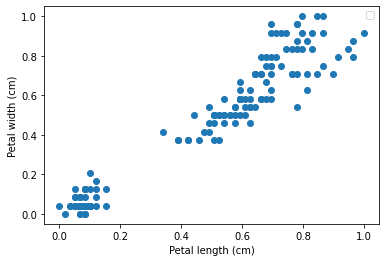

In [68]:
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')

plt.legend()

plt.scatter(iris['petal length (cm)'], iris['petal width (cm)']);

### Creating Cluster with k of 2